In [78]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [79]:
height, width = 200, 200

In [80]:
img = Image.open('../assets/shiba_inu.jpeg').resize((width, height)).convert('L')
arr = np.array(img)

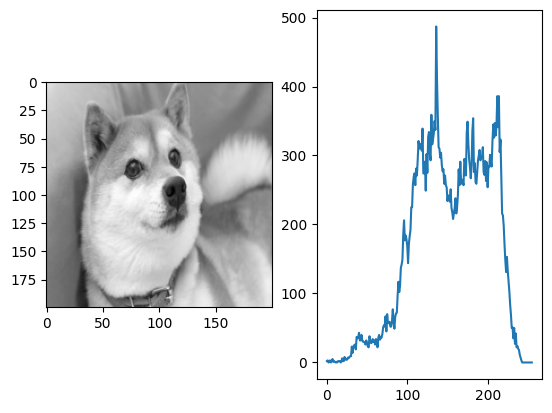

In [81]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img, 'gray')
axes[1].plot(img.histogram())

In [82]:
# Stretch intensities from R1 to R2 -> intensities S1 to S2

r1, r2 = 120, 220
s1, s2 = 40, 240

In [83]:
for i in range(height):
    for j in range(width):
        x = int(arr[i, j])
        if x < r1:
            arr[i, j] = round(s1 * x / r1)
        elif x > r2:
            arr[i, j] = round(255 + (255 - s2) * (x - 255) / (255 - r2))
        else:
            arr[i, j] = round((s2 - s1) * (x - r1) / (r2 - r1) + s1)

In [84]:
newimage = Image.fromarray(arr)

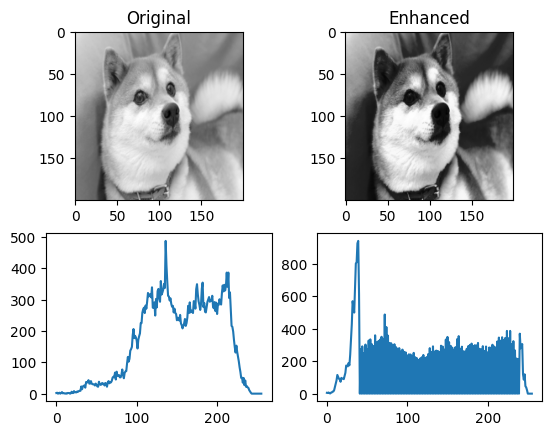

In [85]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].set_title('Original')
axes[0, 0].imshow(img, 'gray')
axes[1, 0].plot(img.histogram())
axes[0, 1].set_title('Enhanced')
axes[0, 1].imshow(newimage, 'gray')
axes[1, 1].plot(newimage.histogram())